### Loading and Cleaning the Data

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading the csv file and specifying the data type for one of the columns
df = pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results_20250315.csv", dtype={'CAMIS':'str', 'ZIPCODE':'str', 'Community Board':'str', 'Council District':'str', 'SCORE':'str'})

#dropping the unnecessary data 
df_cleaned = df.drop(['Census Tract', 'BIN', 'BBL', 'NTA', 'Location Point1', 'PHONE', 'DBA', 'VIOLATION DESCRIPTION', 'Community Board'], axis=1)

#filtring by date to reduce the number of records and show the most recent ones
df_filtered = df_cleaned[df_cleaned['INSPECTION DATE']>='01/01/2015']

#filling na values with 'NA'
df_filtered['VIOLATION CODE'].fillna('NA', inplace=True)
df_filtered['GRADE'].fillna('NA', inplace=True)
df_filtered['GRADE DATE'].fillna('NA', inplace=True)
df_filtered['Council District'].fillna('NA', inplace=True)
df_filtered['SCORE'].fillna('NA', inplace=True)
df_filtered['BUILDING'].fillna('NA', inplace=True)

#dropping the records where data in ZipCode, Latitude, and Longitude is not applicable and might create noise
df_cleanedZip = df_filtered.dropna(subset=['ZIPCODE', 'Latitude', 'Longitude'])

#printing the details about the dataframe
df_cleanedZip.info()
df_cleanedZip.head()

<class 'pandas.core.frame.DataFrame'>
Index: 267784 entries, 12 to 274181
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CAMIS                267784 non-null  object 
 1   BORO                 267784 non-null  object 
 2   BUILDING             267784 non-null  object 
 3   STREET               267784 non-null  object 
 4   ZIPCODE              267784 non-null  object 
 5   CUISINE DESCRIPTION  267784 non-null  object 
 6   INSPECTION DATE      267784 non-null  object 
 7   ACTION               267784 non-null  object 
 8   VIOLATION CODE       267784 non-null  object 
 9   CRITICAL FLAG        267784 non-null  object 
 10  SCORE                267784 non-null  object 
 11  GRADE                267784 non-null  object 
 12  GRADE DATE           267784 non-null  object 
 13  RECORD DATE          267784 non-null  object 
 14  INSPECTION TYPE      267784 non-null  object 
 15  Latitude             

/var/folders/yn/k2psn3zs43157spq1lqt48t00000gn/T/ipykernel_79733/3249452949.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['VIOLATION CODE'].fillna('NA', inplace=True)
/var/folders/yn/k2psn3zs43157spq1lqt48t00000gn/T/ipykernel_79733/3249452949.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['GRADE'].fillna('NA', inplace=True)
/var/folders/yn/k2psn3zs43157spq1lqt48t00000gn/T/ipykernel_79733/3249452949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,CAMIS,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Council District
12,41356242,Manhattan,1515,BROADWAY,10036,American,03/17/2022,No violations were recorded at the time of thi...,NA,Not Applicable,0,A,03/17/2022,03/14/2025,Cycle Inspection / Initial Inspection,40.757629,-73.985803,03
29,50033380,Queens,3202,34TH AVE,11106,Coffee/Tea,06/08/2024,No violations were recorded at the time of thi...,NA,Not Applicable,0,NA,NA,03/14/2025,Inter-Agency Task Force / Initial Inspection,40.759220,-73.926326,26
40,50080759,Manhattan,3-7,E 27TH ST,10016,Mediterranean,11/20/2018,Violations were cited in the following area(s).,15F6,Not Applicable,NA,NA,NA,03/14/2025,Smoke-Free Air Act / Initial Inspection,40.743922,-73.987402,02
43,50009143,Brooklyn,2623,EAST 16 STREET,11235,Turkish,10/15/2024,Violations were cited in the following area(s).,04M,Critical,20,NA,NA,03/14/2025,Cycle Inspection / Initial Inspection,40.587578,-73.953318,48
44,50134535,Manhattan,96,SOUTH STREET,10038,Mexican,11/21/2024,Violations were cited in the following area(s).,02B,Critical,13,A,11/21/2024,03/14/2025,Cycle Inspection / Initial Inspection,40.706374,-74.002882,01


In [5]:
#resetting the index and printing a few records
df_reset = df_cleanedZip.reset_index()
df_reset.head()

,index,CAMIS,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Council District
0,12,41356242,Manhattan,1515,BROADWAY,10036,American,03/17/2022,No violations were recorded at the time of thi...,NA,Not Applicable,0,A,03/17/2022,03/14/2025,Cycle Inspection / Initial Inspection,40.757629,-73.985803,03
1,29,50033380,Queens,3202,34TH AVE,11106,Coffee/Tea,06/08/2024,No violations were recorded at the time of thi...,NA,Not Applicable,0,NA,NA,03/14/2025,Inter-Agency Task Force / Initial Inspection,40.759220,-73.926326,26
2,40,50080759,Manhattan,3-7,E 27TH ST,10016,Mediterranean,11/20/2018,Violations were cited in the following area(s).,15F6,Not Applicable,NA,NA,NA,03/14/2025,Smoke-Free Air Act / Initial Inspection,40.743922,-73.987402,02
3,43,50009143,Brooklyn,2623,EAST 16 STREET,11235,Turkish,10/15/2024,Violations were cited in the following area(s).,04M,Critical,20,NA,NA,03/14/2025,Cycle Inspection / Initial Inspection,40.587578,-73.953318,48
4,44,50134535,Manhattan,96,SOUTH STREET,10038,Mexican,11/21/2024,Violations were cited in the following area(s).,02B,Critical,13,A,11/21/2024,03/14/2025,Cycle Inspection / Initial Inspection,40.706374,-74.002882,01


In [7]:
#printing the number of records
df_reset.count()

#saving the cleaned csv
#df_reset.to_csv('cleaned.csv')

index                  267784
CAMIS                  267784
BORO                   267784
BUILDING               267784
STREET                 267784
ZIPCODE                267784
CUISINE DESCRIPTION    267784
INSPECTION DATE        267784
ACTION                 267784
VIOLATION CODE         267784
CRITICAL FLAG          267784
SCORE                  267784
GRADE                  267784
GRADE DATE             267784
RECORD DATE            267784
INSPECTION TYPE        267784
Latitude               267784
Longitude              267784
Council District       267784
dtype: int64

### Data Visualization using Python

In [9]:
#Creating a dataframe using only Grade and Cuisine columns
new_df = df_reset[['CUISINE DESCRIPTION','GRADE']]
new_df.head(15)

#Creating crosstab
grade_by_cuisine = pd.crosstab(new_df['CUISINE DESCRIPTION'], new_df['GRADE'])
grade_by_cuisine.head()

GRADE,A,B,C,N,NA,P,Z
CUISINE DESCRIPTION,,,,,,,
Afghan,56,9,13,4,96,0,0
African,200,99,92,57,787,7,43
American,17226,2152,1275,1234,20047,86,840
Armenian,13,4,3,5,52,0,0
Asian/Asian Fusion,1214,342,191,231,2951,11,239


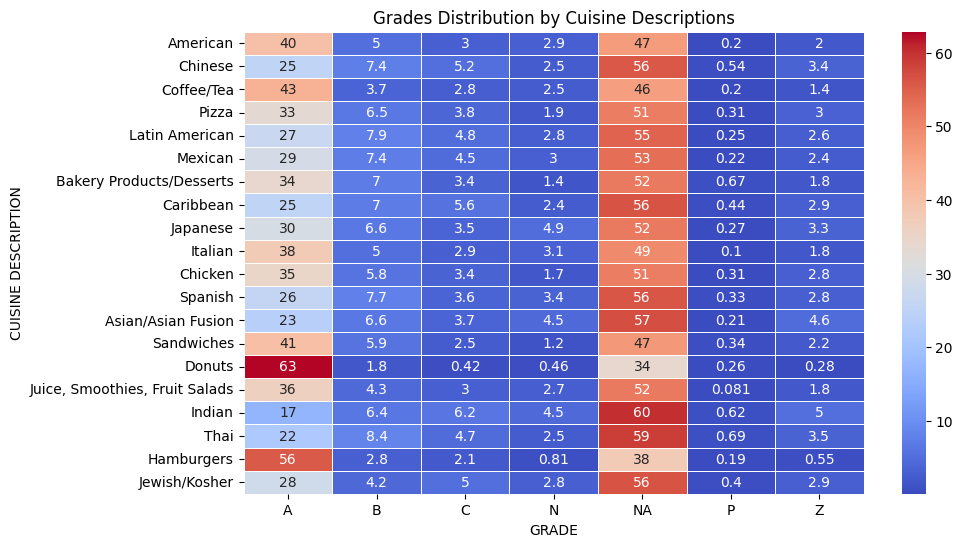

In [11]:
#Filtring for top 20 cuisines
top_20 = grade_by_cuisine.sum(axis=1).sort_values(ascending=False).head(20).index
pivot_df_top20 = grade_by_cuisine.loc[top_20]

#Setting the values to show percentage instead of the count
pivot_df_percentage = pivot_df_top20.div(pivot_df_top20.sum(axis=1), axis=0) * 100

#Creating the plot using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df_percentage, annot=True, cmap="coolwarm", linewidths=0.5)

#Adding labels and title
plt.title("Grades Distribution by Cuisine Descriptions")
plt.xlabel("GRADE")
plt.ylabel("CUISINE DESCRIPTION")

#Showing the plot
plt.show()

### Grades
- `N - Not Yet Graded`
- `NA - Not Applicable`
- `A - Grade A`
- `B - Grade B`
- `C - Grade C`
- `Z = Grade Pending`
- `P = Grade Pending issued on re-opening following an initial inspection that resulted in a closure`

<Figure size 1000x600 with 0 Axes>

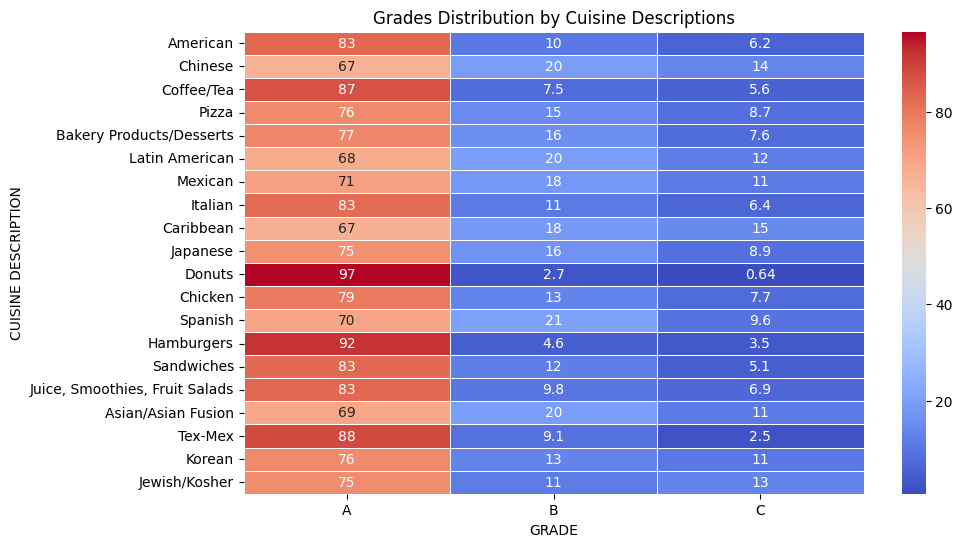

In [13]:
#Dropping the grades we are not interested in
df_dropped_grades = grade_by_cuisine.drop(columns=["N", "NA", "P", "Z"], errors="ignore")

#Filtring for top 20 cuisines
top_20 = df_dropped_grades.sum(axis=1).sort_values(ascending=False).head(20).index
pivot_df_top20 = df_dropped_grades.loc[top_20]

#Setting the values to show percentage instead of the count
pivot_df_percentage = pivot_df_top20.div(pivot_df_top20.sum(axis=1), axis=0) * 100

#Creating the plot using seaborn
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df_percentage, annot=True, cmap="coolwarm", linewidths=0.5)

#Adding labels and title
plt.title("Grades Distribution by Cuisine Descriptions")
plt.xlabel("GRADE")
plt.ylabel("CUISINE DESCRIPTION")

#Showing the plot
plt.show()